In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
# from colorsetup import colors, pallete

In [77]:
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

In [4]:
data = pd.read_csv('gps data.csv')

In [5]:
le=LabelEncoder()
data['Activity']=le.fit_transform(data['Activity'])

In [6]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [44]:
res = {}
for cl in le.classes_:
    res.update({cl:le.transform([cl])[0]})
res

{'LAYING': 0,
 'SITTING': 1,
 'STANDING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

In [7]:
data.Activity.value_counts(normalize=True)

3    0.202649
2    0.188079
0    0.169536
1    0.161589
5    0.148344
4    0.129801
Name: Activity, dtype: float64

In [8]:
feature_columns=[x for x in data.columns if x != 'Activity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data['Activity'], random_state=42, test_size=0.3)

In [10]:
param_grid={'learning_rate':[0.01,0.001],'subsample': [1.0,0.5],'max_features': [2,3]}

GV_GBC=GridSearchCV(GradientBoostingClassifier(n_estimators=20, random_state=42),param_grid=param_grid, scoring='accuracy',n_jobs=-1)

GV_GBC=GV_GBC.fit(X_train,y_train)

In [11]:
GV_GBC.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [32]:
y_pred=GV_GBC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        42
           1       0.71      0.75      0.73        40
           2       0.67      1.00      0.80        47
           3       0.89      1.00      0.94        51
           4       1.00      0.82      0.90        33
           5       0.97      1.00      0.99        37

    accuracy                           0.83       250
   macro avg       0.88      0.82      0.82       250
weighted avg       0.87      0.83      0.82       250



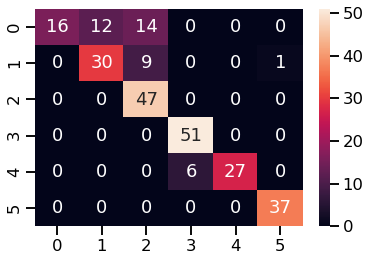

In [34]:
sns.set_context('talk')
cm=confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm,annot=True,fmt='d')

In [13]:
LR_L2 = LogisticRegression(penalty='l2',solver='saga',max_iter=500).fit(X_train,y_train)

In [35]:
GB=GradientBoostingClassifier(n_estimators=20, random_state=42,learning_rate=0.01,max_depth= 3,max_features= 3)

In [36]:
estimators=[('LR',LR_L2),('GB',GB)]

In [37]:
VC=VotingClassifier(estimators,voting='soft')

In [38]:
VC=VC.fit(X_train,y_train)

In [39]:
y_pred2=VC.predict(X_test)

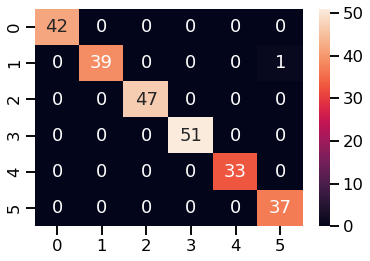

In [40]:
sns.set_context('talk')
cm=confusion_matrix(y_test, y_pred2)
ax=sns.heatmap(cm,annot=True,fmt='d')

In [41]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.97      0.99        40
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        33
           5       0.97      1.00      0.99        37

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [19]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)

In [20]:
train_idx, test_idx = next(sss.split(data[feature_columns], data['Activity']))

In [21]:
X_train=X=data.loc[train_idx,feature_columns]
y_train=data.loc[train_idx,'Activity']

X_test=data.loc[test_idx,feature_columns]
y_test=data.loc[test_idx,'Activity']

In [22]:
y_train.value_counts(normalize=True)

3    0.201980
2    0.188119
0    0.170297
1    0.162376
5    0.148515
4    0.128713
Name: Activity, dtype: float64

In [54]:
lr = LogisticRegression()
lr=lr.fit(X_train,y_train)

In [53]:
lr.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [51]:
lr2=LogisticRegression(penalty='l2',solver='saga',max_iter=500)

In [64]:
coefficients=list()

coeff_labels=['lr','l2']
coeff_models=[lr,LR_L2]

for lab, mod in zip(coeff_labels,coeff_models):
#       print('lab:',lab)
#       print('mod:',mod)
    coeffs = mod.coef_
    coeff_label=pd.MultiIndex(levels=[[lab],[0,1,2,3,4,5]],codes=[[0,0,0,0,0,0],[0,1,2,3,4,5]])
#     print(coeff_label)
    coefficients.append(pd.DataFrame(coeffs.T,columns=coeff_label))

coefficients=pd.concat(coefficients,axis=1)
    
coefficients.sample(5)

lr                                                          l2  \
            0         1         2         3         4         5         0   
299 -0.038009  0.145845 -0.041499 -0.066864 -0.212997  0.213524  0.006480   
348 -0.025763 -0.026534 -0.129549  0.257322 -0.080456  0.004979 -0.027699   
154 -0.078108  0.046780 -0.012723  0.001217 -0.037389  0.080222 -0.087357   
392 -0.016389  0.015352  0.038982 -0.024473  0.010887 -0.024360 -0.013672   
9   -0.042749 -0.078212 -0.118331 -0.218605  0.506116 -0.048219 -0.040210   

                                                       
            1         2         3         4         5  
299  0.197881 -0.115397 -0.080611 -0.220544  0.212191  
348 -0.039666 -0.115451  0.263472 -0.098227  0.017572  
154  0.087623 -0.035060  0.031718 -0.059223  0.062299  
392  0.005897  0.040982 -0.029509  0.018304 -0.022002  
9   -0.092110 -0.132672 -0.207659  0.501333 -0.028682

In [67]:
coefficients.shape

(561, 12)

In [65]:
LR_L2.coef_.shape

(6, 561)

coef_ndarray of shape (1, n_features) or (n_classes, n_features)

In [66]:
data.shape

(755, 562)

In [45]:
0.4*64

25.6

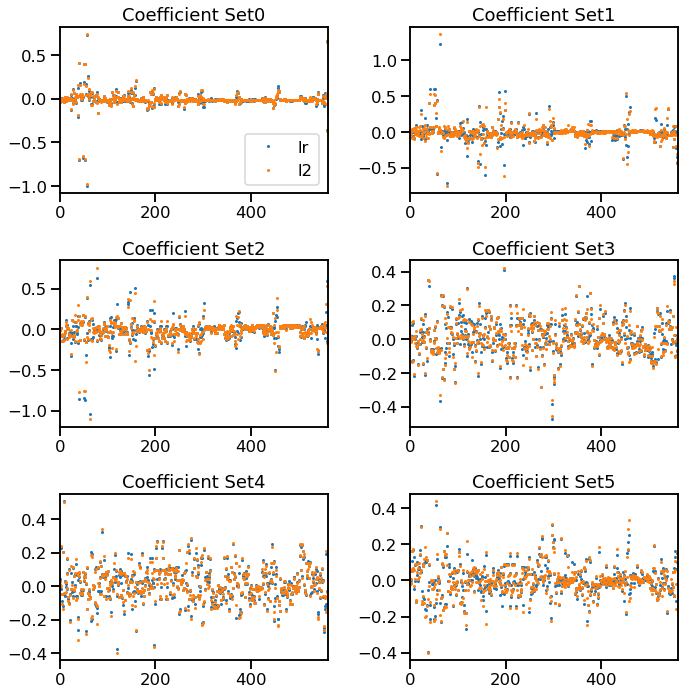

In [68]:
fig, axList = plt.subplots(nrows=3,ncols=2)
axList=axList.flatten()
fig.set_size_inches(10,10)

for loc, ax in enumerate(axList):
    data = coefficients.xs(loc,level=1,axis=1)
    data.plot(marker='o',ls='',ms=2.0,ax=ax,legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set'+str(loc))
    
plt.tight_layout()

In [82]:
axList

array([<AxesSubplot:title={'center':'Coefficient Set0'}>,
       <AxesSubplot:title={'center':'Coefficient Set1'}>,
       <AxesSubplot:title={'center':'Coefficient Set2'}>,
       <AxesSubplot:title={'center':'Coefficient Set3'}>,
       <AxesSubplot:title={'center':'Coefficient Set4'}>,
       <AxesSubplot:title={'center':'Coefficient Set5'}>], dtype=object)

In [83]:
len(axList)

6

In [84]:
axList[:-1]

array([<AxesSubplot:title={'center':'Coefficient Set0'}>,
       <AxesSubplot:title={'center':'Coefficient Set1'}>,
       <AxesSubplot:title={'center':'Coefficient Set2'}>,
       <AxesSubplot:title={'center':'Coefficient Set3'}>,
       <AxesSubplot:title={'center':'Coefficient Set4'}>], dtype=object)

In [71]:
y_pred=list()
y_prob=list()

coeff_labels=['lr','l2']
coeff_models=[lr,LR_L2]

for lab, mod in zip(coeff_labels,coeff_models):
#       print('lab:',lab)
#       print('mod:',mod)
    y_pred.append(pd.Series(mod.predict(X_test),name=lab))
    coeff_label=pd.MultiIndex(levels=[[lab],[0,1,2,3,4,5]],codes=[[0,0,0,0,0,0],[0,1,2,3,4,5]])
#     print(coeff_label)
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test),columns=coeff_label))

y_pred=pd.concat(y_pred,axis=1)
y_prob=pd.concat(y_prob,axis=1)
    
y_pred.head(5)

,lr,l2
0,3,3
1,2,2
2,3,3
3,2,2
4,5,5


In [72]:
y_prob.head(5)

lr                                                              l2  \
          0         1         2         3             4         5         0   
0  0.000002  0.000003  0.000021  0.995362  4.496504e-03  0.000115  0.000001   
1  0.000443  0.005691  0.993812  0.000045  1.291441e-07  0.000009  0.000255   
2  0.000011  0.000076  0.000026  0.991296  8.157701e-03  0.000434  0.000009   
3  0.001646  0.023988  0.974251  0.000102  4.408879e-07  0.000012  0.001141   
4  0.001004  0.001067  0.007719  0.001001  7.068138e-04  0.988503  0.000516   

                                                         
          1         2         3             4         5  
0  0.000005  0.000019  0.995769  4.095014e-03  0.000110  
1  0.003586  0.996108  0.000041  1.214614e-07  0.000009  
2  0.000112  0.000025  0.989370  1.005634e-02  0.000427  
3  0.018910  0.979802  0.000135  4.952109e-07  0.000012  
4  0.001039  0.003401  0.000733  4.320451e-04  0.993880

In [73]:
y_pred.shape

(250, 2)

In [74]:
y_prob.shape

(250, 12)

In [79]:
metrics = list()
cm=dict()

for lab in coeff_labels:
    
    precision, recall, fscore, _ = score (y_test, y_pred[lab], average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]), y_prob[lab],average='weighted')
    
    cm[lab]=confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall': recall, 'fscore':fscore, 'accuracy':accuracy, 'auc':auc},name=lab))

metrics=pd.concat(metrics, axis=1)

In [80]:
metrics

,lr,l2
precision,0.996105,1.0
recall,0.996000,1.0
fscore,0.996001,1.0
accuracy,0.996000,1.0
auc,0.999848,1.0


In [81]:
label_binarize(y_test, classes=[0,1,2,3,4,5])

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]])

AxesSubplot(0.125,0.536818;0.352273x0.343182) lr
AxesSubplot(0.547727,0.536818;0.352273x0.343182) l2


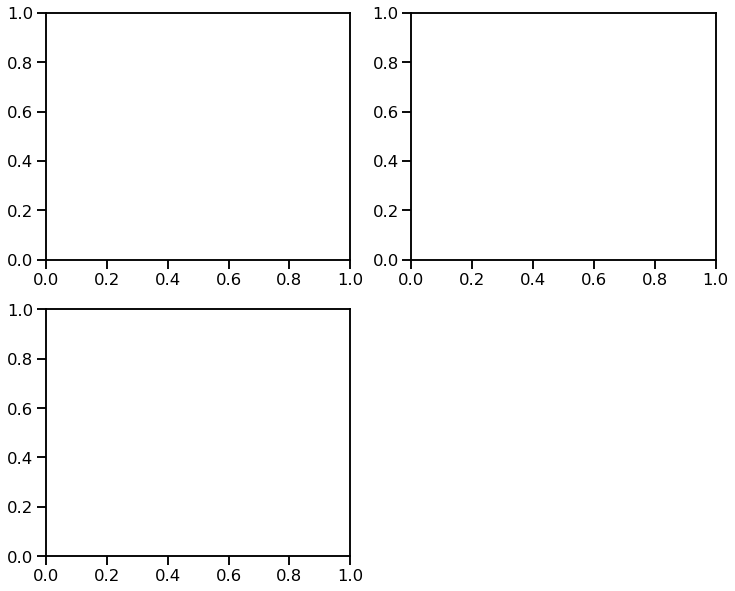

In [85]:
fig, axList=plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12,10)

axList[-1].axis('off')
for ax, lab in zip(axList[:-1],coeff_labels):
    print (ax, lab)

AxesSubplot(0.125,0.536818;0.352273x0.343182) var3
AxesSubplot(0.547727,0.536818;0.352273x0.343182) var4


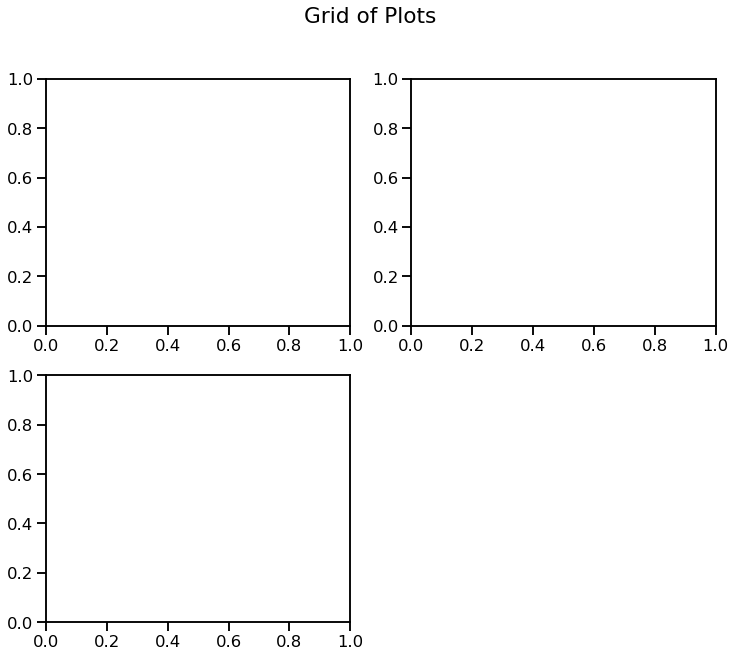

In [88]:
#create some data
var1 = [1, 2, 3, 4, 5, 6]
var2 = [7, 13, 16, 18, 25, 19]
var3 = [29, 25, 20, 25, 20, 18]
var4 = [4, 4, 6, 4, 7, 11]

var_lab=['var3','var4']
#define grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()
fig.set_size_inches(12,10)

axs[-1].axis('off')
#add title
fig.suptitle('Grid of Plots')

for ax, lab in zip(axs[:-1],var_lab):
    print (ax, lab)
    
# #add data to plots
# axs[0, 0].plot(var1, var2)
# axs[0, 1].plot(var1, var3)
# axs[1, 0].plot(var1, var4)
# axs[1, 1].plot(var3, var1)

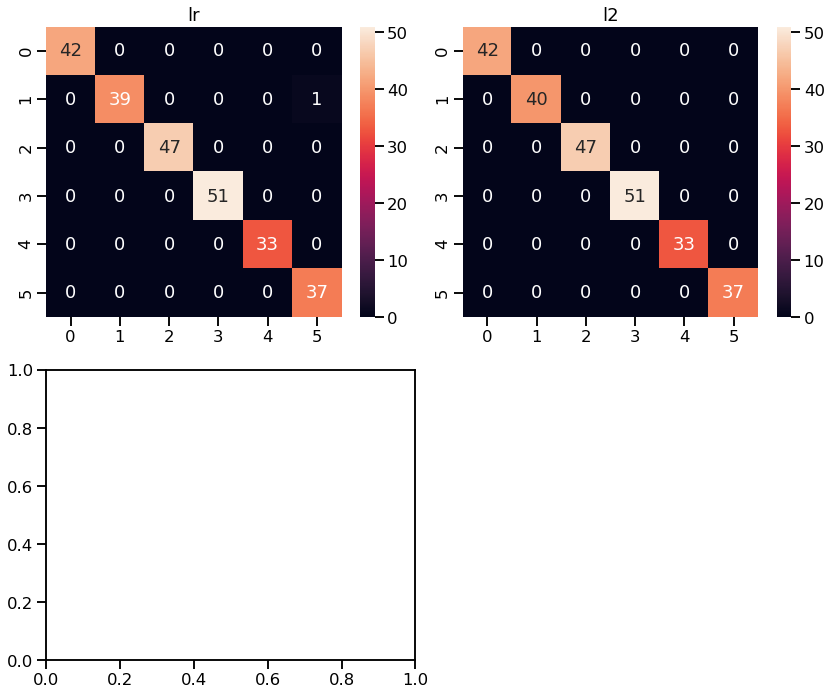

In [90]:
fig, axList=plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12,10)

axList[-1].axis('off')
for ax, lab in zip(axList[:-1],coeff_labels):
    sns.heatmap(cm[lab],ax=ax,annot=True,fmt='d')
    ax.set(title=lab);
plt.tight_layout()

# Clustering

In [158]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [145]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [98]:
scores = []
increment, max_features = 50, 150

for num in np.linspace(increment, max_features, increment, dtype='int'):
    X,y = make_classification(n_features=num, n_redundant=0, random_state=1, n_clusters_per_class=1, n_classes=3)
    rng=np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    
    X=StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.4)
    
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    scores.append(DT.score(X_test,y_test))

Text(0.5, 0, 'Number of feat')

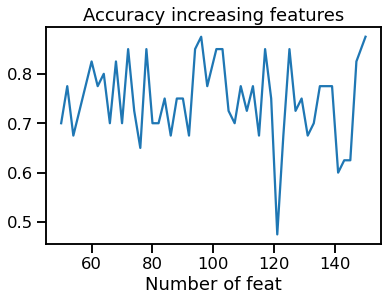

In [99]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
plt.title('Accuracy increasing features')
plt.xlabel('Number of feat')

In [102]:
wine=pd.read_csv('Wine_Quality_Data.csv')

In [103]:
wine.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [115]:
red = sns.color_palette()[2]
white = sns.color_palette()[4]

# bin_range=np.array([3,4,5,6,7,8,9])  # me: could also be class labels

# ax==plt.axes()
# for , plot_color in zip(['red','white'],[])

In [106]:
float_columns = [x for x in wine.columns if x not in ['color', 'quality']]

corr_mat = wine[float_columns].corr()

for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029


In [107]:
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

In [108]:
skew_columns=(wine[float_columns].skew().sort_values(ascending=False))

skew_columns=skew_columns.loc[skew_columns>0.75]

skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [111]:
for col in skew_columns.index.tolist():
    wine[col]=np.log1p(wine[col])

In [112]:
sc=StandardScaler()
wine[float_columns]=sc.fit_transform(wine[float_columns])

wine.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red


In [122]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

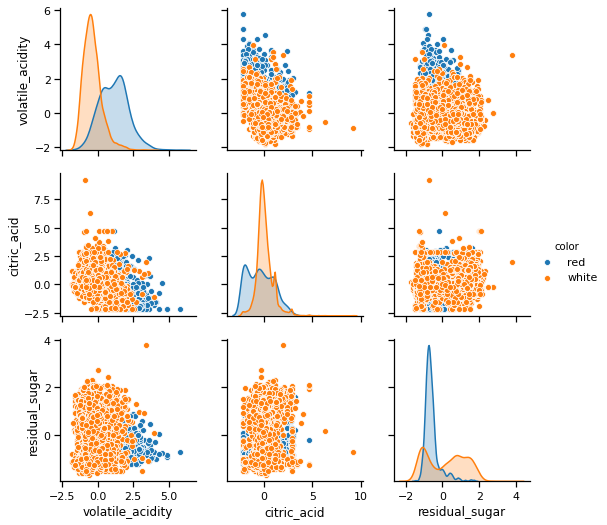

In [138]:
sns.set_context('notebook')
sns.color_palette("mako")
# sns.pairplot(wine[float_columns]) # how to get second color hue='color'
wine_s=wine.iloc[:,[1,2,3,12]] #filter columsn before including hue -columns!!!!!
wine_s.columns
sns.pairplot(wine_s,hue='color')

In [125]:
km=KMeans(n_clusters=2,random_state=42)
km.fit(wine[float_columns])

wine['kmeans']=km.predict(wine[float_columns])

In [126]:
(wine[['color','kmeans']].groupby(['kmeans','color']).size().to_frame().rename(columns={0:'number'}))

number
kmeans color        
0      red        23
       white    4810
1      red      1576
       white      88

In [127]:
# unique_elements, counts_elements = np.unique(a, return_counts=True)

In [139]:
km_list=list()

for clust in range(1,5):
    km=KMeans(n_clusters=clust,random_state=42)
    km.fit(wine[float_columns])
    
    km_list.append(pd.Series({'clusters':clust,'inertia':km.inertia_,'model':km}))

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Inertia')]

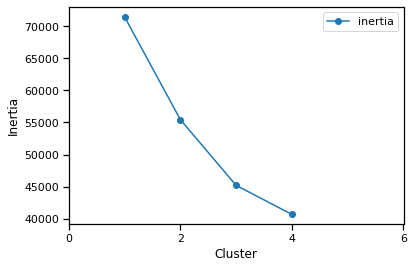

In [141]:
plot_data=(pd.concat(km_list,axis=1)).T[['clusters','inertia']].set_index('clusters')

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,6)
ax.set(xlabel='Cluster',ylabel='Inertia')

In [143]:

ag = AgglomerativeClustering(n_clusters=2,linkage='ward',compute_full_tree=True)
# ag = ag.fit(wine[float_columns])
wine['agglom']=ag.fit_predict(wine[float_columns])

In [144]:
(wine[['color','agglom','kmeans']].groupby(['color','agglom']).size().to_frame().rename(columns={0:'number'}))

number
color agglom        
red   0           31
      1         1568
white 0         4755
      1          143

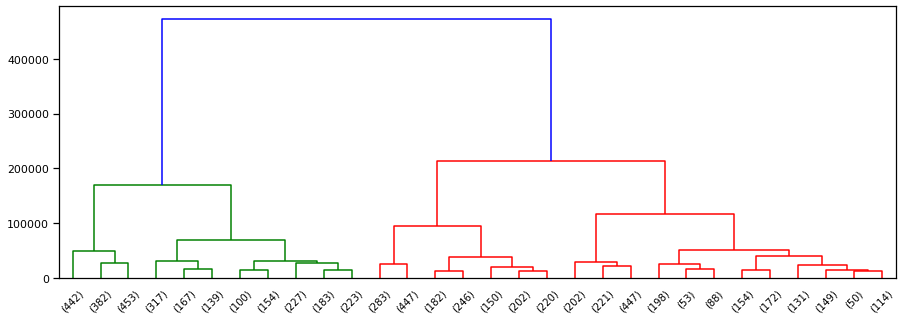

In [147]:
Z = hierarchy.linkage(ag.children_,method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z,orientation='top',p=30, truncate_mode='lastp',show_leaf_counts=True,ax=ax )

In [148]:
wine.shape

(6497, 15)

In [157]:
y=(wine['quality']>7).astype(int)
X_with_kmeans=wine.drop(['agglom','color','quality'],axis=1)
X_wo_kmeans=X_with_kmeans.drop('kmeans',axis=1)
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.33, random_state=42)

def get_avg_roc_3splits(estimator,X,y):
    roc_auc_list=[]
    for train_index, test_index in sss.split(X,y):
        X_train, X_test=X.iloc[train_index], X.iloc[test_index]
        y_train, y_test=y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted=estimator.predict(X_test)
        y_scored=estimator.predict_proba(X_test)[:,1]
        roc_auc_list.append(roc_auc_score(y_test,y_scored))
    return np.mean(roc_auc_list)

estimator=RandomForestClassifier(max_depth=2)
roc_with_kmeans=get_avg_roc_3splits(estimator,X_with_kmeans,y)
roc_wo_kmeans=get_avg_roc_3splits(estimator,X_wo_kmeans,y)
print(roc_with_kmeans)
print(roc_wo_kmeans)

0.7996671597633137
0.7985502958579883


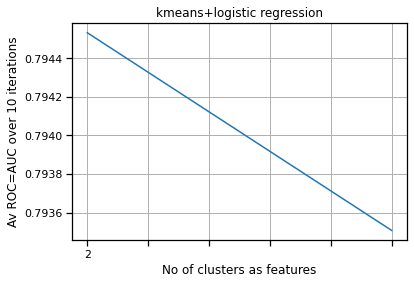

In [165]:
X_basics=wine[float_columns]
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.33, random_state=42)

def create_kmeans_columns(n):
    km=KMeans(n_clusters=n)
    km.fit(X_basics)
    km_col=pd.Series(km.predict(X_basics))
    km_cols=pd.get_dummies(km_col,prefix='kmeans_cluster')
    return pd.concat([X_basics,km_cols],axis=1)

estimator=LogisticRegression()
ns=range(1,3)
roc_auc_list=[get_avg_roc_3splits(estimator,create_kmeans_columns(n),y) for n in ns]

ax=plt.axes()
ax.plot(ns,roc_auc_list)
ax.set(xticklabels=ns,xlabel='No of clusters as features',ylabel='Av ROC=AUC over 10 iterations',title='kmeans+logistic regression')

ax.grid(True)

???

In [166]:
km_cols

,kmeans_clsuter_0,kmeans_clsuter_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6492,1,0
6493,1,0
6494,1,0
6495,1,0


In [167]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,-9.449114e-16,1.000077,-3.629006,-0.644436,-0.106896,0.471461,5.049633
volatile_acidity,6497.0,1.749836e-16,1.000077,-1.817681,-0.684343,-0.269292,0.443810,5.771086
citric_acid,6497.0,2.187295e-17,1.000077,-2.192833,-0.472334,-0.059414,0.491146,9.231281
residual_sugar,6497.0,1.749836e-17,1.000077,-1.687053,-0.866619,-0.343710,0.861368,3.783867
chlorides,6497.0,6.999344e-17,1.000077,-1.463780,-0.543350,-0.262922,0.290773,13.734706
free_sulfur_dioxide,6497.0,-1.749836e-16,1.000077,-3.927293,-0.574982,0.204386,0.717742,3.665722
total_sulfur_dioxide,6497.0,-6.999344e-17,1.000077,-1.941780,-0.685532,0.039907,0.712265,5.737257
density,6497.0,-3.552167e-15,1.000077,-2.530192,-0.785953,0.064489,0.764853,14.768791
pH,6497.0,2.729744e-15,1.000077,-3.100615,-0.674862,-0.052874,0.631312,4.923029
sulphates,6497.0,-1.749836e-16,1.000077,-2.432834,-0.699339,-0.105201,0.526688,7.387697
